In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [142]:
variation ={}

In [ ]:
def evaluate_Algo(df):
    sp_clus_pts_dict ={"Gentoo":[],"Chinstrap":[],"Adelie":[]}
    for sp in sp_clus_pts_dict:
        sp_clusters_assign = df[df.species == sp].cluster.unique()
        # print(f"For species {sp} :")
        for clus in sp_clusters_assign:
            pts_in_cluster = df[(df.species == sp)&(df.cluster == clus)].cluster.count()
            sp_clus_pts_dict[sp].append((clus,pts_in_cluster))
            # print(f"there are {pts_in_cluster} assigned in cluster {clus}")
        
        # if len(sp_clus_pts_dict[sp]) == 0 :
        #     print(f" No clustering for {sp}.")
        #     print(f" There is No samples in that cluster")
        # elif len(sp_clus_pts_dict[sp]) == 1 :
        #     print(f" Successfull clustering for {sp} as cluster {sp_clus_pts_dict[sp][0][0]}")
        #     print(f" There is {sp_clus_pts_dict[sp][0][1]} samples in that cluster")
        # else:
        #     print(f"Wrong clustering within {sp}.")
        #     max= 0
        #     for wrong_clus in sp_clus_pts_dict[sp]:
        #         if wrong_clus[1] > max:
        #             max = wrong_clus[1] 
        #             max_clus = wrong_clus[0]
        #     print(max)
    return sp_clus_pts_dict

    

In [ ]:
from sklearn import preprocessing,cluster
def evaluate_kmean_allscalers(df,features):
    scalers={
        "std":preprocessing.StandardScaler(),
        "minmax" : preprocessing.MinMaxScaler(),
        "robust" : preprocessing.RobustScaler(),
        "quantileT":preprocessing.QuantileTransformer(n_quantiles=df.shape[0]),
        "powerT":preprocessing.PowerTransformer()
    }
    for scaler in scalers:
        my_scaler = scalers[scaler].set_output(transform='pandas')
        df_scaled_df = my_scaler.fit_transform(df)
        # let's see the first 5 observations after normalising the data
        my_model = cluster.KMeans(n_clusters=3,n_init=10)
        my_model.fit(df_scaled_df)
        peng_c_df["cluster"] = my_model.predict(df_scaled_df)
        variation[scaler +",allfeatures"] = evaluate_Algo(peng_c_df)


std
minmax
robust
quantileT
powerT


# Explore penguins Dataset

In [129]:
peng_df = sns.load_dataset("penguins")
peng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Clean peng_df

In [130]:
peng_c_df = peng_df.copy()

In [131]:
peng_c_df.means = " clean version"

In [132]:
peng_c_df = peng_c_df.dropna()


In [133]:
# drop un-relevent features
peng_c_df = peng_c_df.drop(["island","sex"],axis=1)

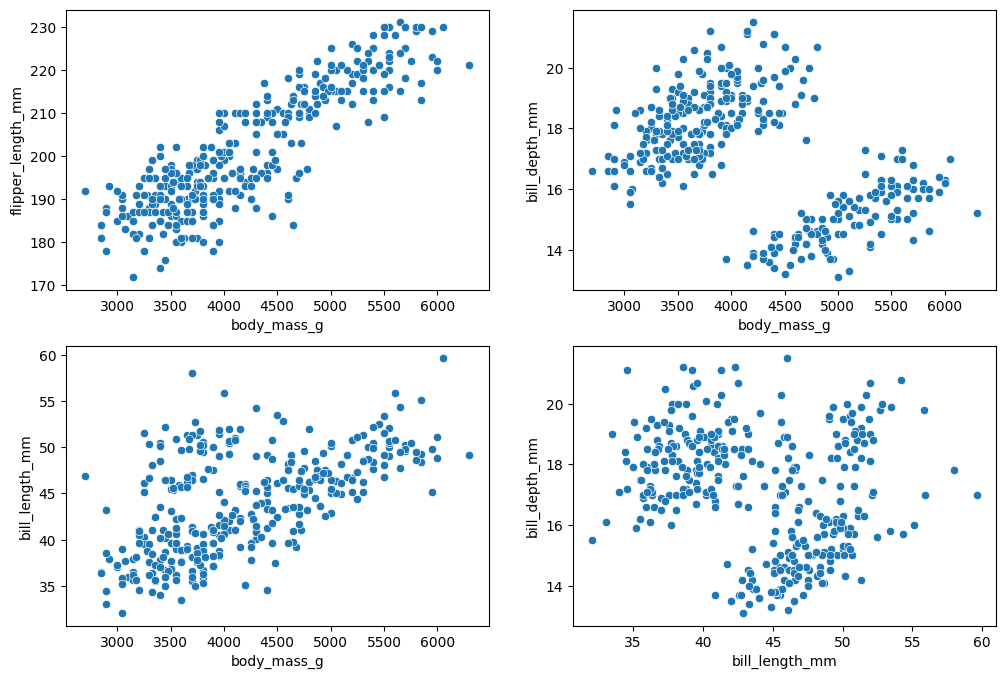

In [62]:
# # num_features = peng_cf_df.shape[1]/2
# num_features=2
# fig, ax = plt.subplots(2,2,figsize=(12, 8))
# for i in range(num_features):
#     for j in range(num_features):
#         if i == j: continue
#         x= peng_cf_df.columns[i]
#         y= peng_cf_df.columns[j]
#         sns.scatterplot(data=peng_cf_df, x=x, y=y,ax=ax[i,j])
            
    
fig, ax = plt.subplots(2,2,figsize=(12, 8))
sns.scatterplot(data=peng_c_df, x='body_mass_g', y='flipper_length_mm',ax=ax[0,0])
sns.scatterplot(data=peng_c_df, x='body_mass_g', y='bill_depth_mm',ax=ax[0,1])
sns.scatterplot(data=peng_c_df, x='body_mass_g', y="bill_length_mm",ax=ax[1,0])
#sns.scatterplot(data=peng_c_df, x='body_mass_g', y="body_mass_g",ax=ax[1,1])
sns.scatterplot(data=peng_c_df, x='bill_length_mm', y="bill_depth_mm",ax=ax[1,1])
plt.show()

#choosing the right features to consider can affect highly the created clusters
# example : if choose only body_mass_g and bill_depth_mm.. we can end up with having 2 cluster and not 3

# Analyze Variations
- features to consider (bill_length_mm ,bill_depth_mm  ,flipper_length_mm  ,body_mass_g)
- number of clusters --> k=3
- Transformer to use (MinMax,std,robust,quantile,power...)

## Considering all features

In [135]:
peng_cf_df = peng_c_df.drop("species",axis=1).copy()

In [ ]:
evaluate_kmean_allscalers(peng_cf_df,"allfeatures")

## Considering all features

In [145]:
pd.DataFrame(variation)

,"std,allfeatures","minmax,allfeatures","robust,allfeatures","quantileT,allfeatures","powerT,allfeatures"
Gentoo,"[(0, 119)]","[(2, 119)]","[(2, 119)]","[(0, 119)]","[(0, 119)]"
Chinstrap,"[(2, 63), (1, 5)]","[(0, 60), (1, 8)]","[(0, 61), (1, 7)]","[(1, 61), (2, 7)]","[(2, 60), (1, 8)]"
Adelie,"[(1, 124), (2, 22)]","[(1, 117), (0, 29)]","[(1, 124), (0, 22)]","[(2, 116), (1, 30)]","[(1, 116), (2, 30)]"
